In [1]:
import numpy as np
import scipy.io
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import cm

In [ ]:
## Please change the following paths to match your own file locations.
data_root = '/Users/huasong/Desktop/data/5.Annual average data/'  
chl_data = scipy.io.loadmat(os.path.join(data_root, 'Chl_data.mat'))
lon_data = scipy.io.loadmat(os.path.join(data_root, 'Lon.mat'))
lat_data = scipy.io.loadmat(os.path.join(data_root, 'Lat.mat'))

Chl = chl_data['Chl'][:,0:680]  
Lat = lat_data['Lat'][:,0:680]  
Lon = lon_data['Lon'][:,0:680] 


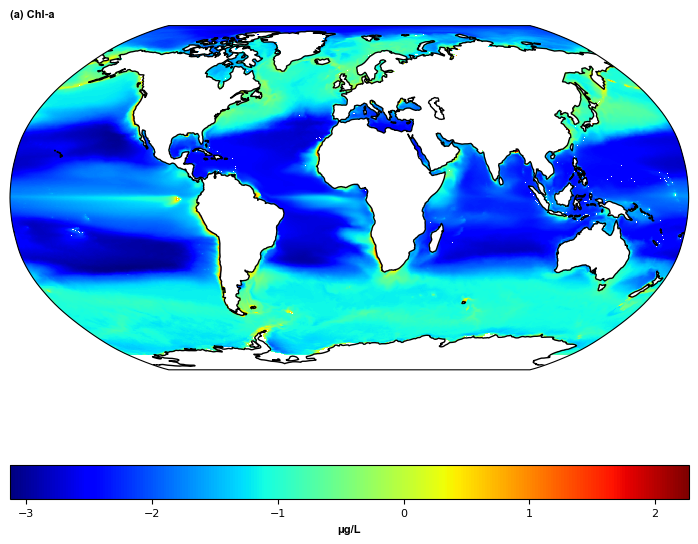

In [7]:
def plot_map(ax, data, title, cmap,cbar_label):
    ax.set_global()  
    ax.coastlines()
    ax.add_feature(cfeature.LAND, facecolor='white')
    mesh = ax.pcolormesh(Lon, Lat, data, transform=ccrs.PlateCarree(), cmap=cmap)
    ax.set_title(title, fontsize=8, fontweight='bold', loc='left', fontname='Arial')
    cbar = plt.colorbar(mesh, ax=ax, orientation='horizontal', fraction=0.05, pad=0.1)
    cbar.set_label(cbar_label, fontsize=8, fontweight='bold', fontname='Arial')
    cbar.ax.tick_params(labelsize=8)
    return mesh


cmap = plt.cm.jet


data = Chl
label = '(a) Chl-a'
unit = 'μg/L'


fig, ax = plt.subplots(1, 1, figsize=(18/2.54, 17*1.5/2.54), subplot_kw={'projection': ccrs.Robinson()})
plot_map(ax, data, label, cmap, unit)

plt.tight_layout()
# plt.savefig('your_path.png', dpi=600, bbox_inches='tight')
plt.show()